# <center> Обучение с учителем. Классификация. Практика

## <center> Прогнозирование оттока клиентов банка

## Постановка задачи

Теперь настало время самостоятельной работы. В рамках самостоятельной работы вам предстоит решить задачу прогнозирования оттока клиентов банка. 

> **Примечание.** Вы уже знакомились с этой задачей в модуле по визуализации («PYTHON-13. Визуализация данных») и провели небольшое исследование данных. Вы можете использовать результаты своего исследования для построения модели машинного обучения.

Напомним контекст задачи:

> Некоторый банк обратился к вам за помощью: он хочет разработать кампанию лояльности по удержанию клиентов. Для этого он хочет прогнозировать вероятности оттока клиентов и определять, уйдёт ли клиент в ближайшее время. 

Итак, ранее вы провели небольшой разведывательный анализ, познакомились с данными и выявили, чем ушедшие клиенты отличаются от лояльных и как между собой связаны различные признаки, определяющие клиентов. Вы отлично справились с первой задачей, и теперь представители банка предлагают вам построить саму модель машинного обучения, которая будет прогнозировать отток клиентов. 

**Ваша задача** - построить классификатор, который позволит своевременно определять уходящих клиентов банка, оценить качество построенных моделей и проинтерпретировать результаты.

Разделим эту задачу на две части:
* В первой части мы подготовим данные для моделирования и построим простейшую модель логистической регрессии, оценим её качество и проанализируем результаты её работы.

* Во второй части мы займёмся построением моделей дерева решений и случайного леса, сравним их результаты с результатами, полученными на первом этапе, и сделаем финальный вывод.


Для начала импортируем библиотеки, которые нам понадобятся:

In [1]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn import linear_model #линейные модели
from sklearn import metrics #метрики
from sklearn import model_selection #сплитование выборки
from sklearn import preprocessing #предобработка данных

Итак, прочитаем нашу таблицу:

In [2]:
churn_data = pd.read_csv('data/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Практика: логистическая регрессия

В первой части вам предстоит выполнить задания 5.0–5.6. Максимальное количество баллов, которое можно получить, — 9:

### Задание 5.0 (не оценивается)

Для полноты задачи проведите небольшой разведывательный анализ данных. Постройте графики распределения целевого признака, диаграммы и графики, показывающие взаимосвязь между исходными признаками и целевым признаком, а также другие диаграммы, иллюстрирующие предоставленные данные. 

**Совет:** воспользуйтесь кодом, который вы писали, выполняя задания в модуле «PYTHON-13. Визуализация данных».

In [3]:
## Dataset information
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
# Dataset statistics (numerical features)
churn_data.describe(include=np.number)

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
# Dataset statistics (categorical features)
churn_data.describe(exclude=np.number)

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


In [6]:
# Create copy and transform some features in order to get more appropriable appearance
churn_copy = churn_data.copy()
churn_copy['ChurnStatus'] = churn_copy['Exited'].apply(lambda x: 'exited' if x == 1 else 'loyal')
churn_copy['HasCrCard'] = churn_copy['HasCrCard'].apply(lambda x: 'yes' if x == 1 else 'no')
churn_copy['IsActiveMember'] = churn_copy['IsActiveMember'].apply(lambda x: 'yes' if x == 1 else 'no')
churn_copy.drop(['RowNumber', 'Surname', 'Exited'], axis=1, inplace=True)
churn_copy.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,ChurnStatus
0,15634602,619,France,Female,42,2,0.00,1,yes,yes,101348.88,exited
1,15647311,608,Spain,Female,41,1,83807.86,1,no,yes,112542.58,loyal
2,15619304,502,France,Female,42,8,159660.80,3,yes,no,113931.57,exited
3,15701354,699,France,Female,39,1,0.00,2,no,no,93826.63,loyal
4,15737888,850,Spain,Female,43,2,125510.82,1,yes,yes,79084.10,loyal


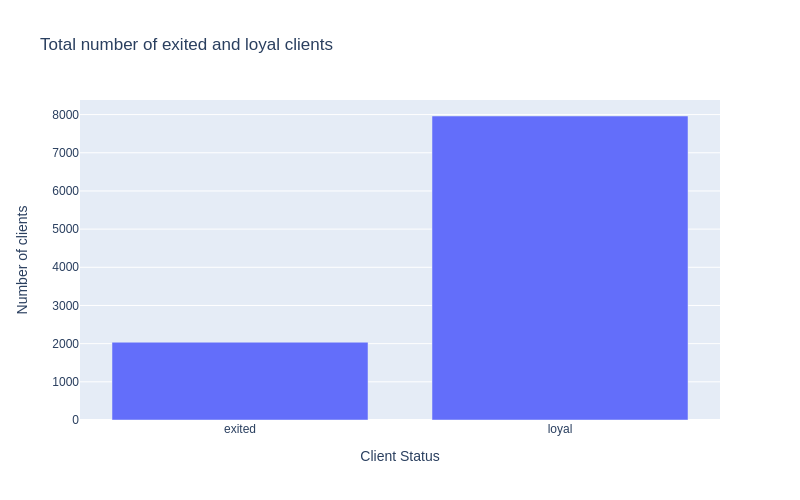

In [7]:
# Check whether both classes are balanced
status_cnt = churn_copy.groupby(['ChurnStatus'])['CustomerId'].count()
fig_churn = px.bar(
    status_cnt,
    x=status_cnt.index,
    y='CustomerId',
    orientation='v',
    height=500,
    width=800,
    title='Total number of exited and loyal clients'
)
fig_churn.layout.xaxis.title.text = 'Client Status'
fig_churn.layout.yaxis.title.text = 'Number of clients'
fig_churn.write_html('images/churn.html')
fig_churn.write_image('images/churn.png')
fig_churn.show('png')
#fig_churn.show()

*Мы видим, что два класса целевого признака несбалансированы. Нельзя ориентироваться на метрику Accuracy.*

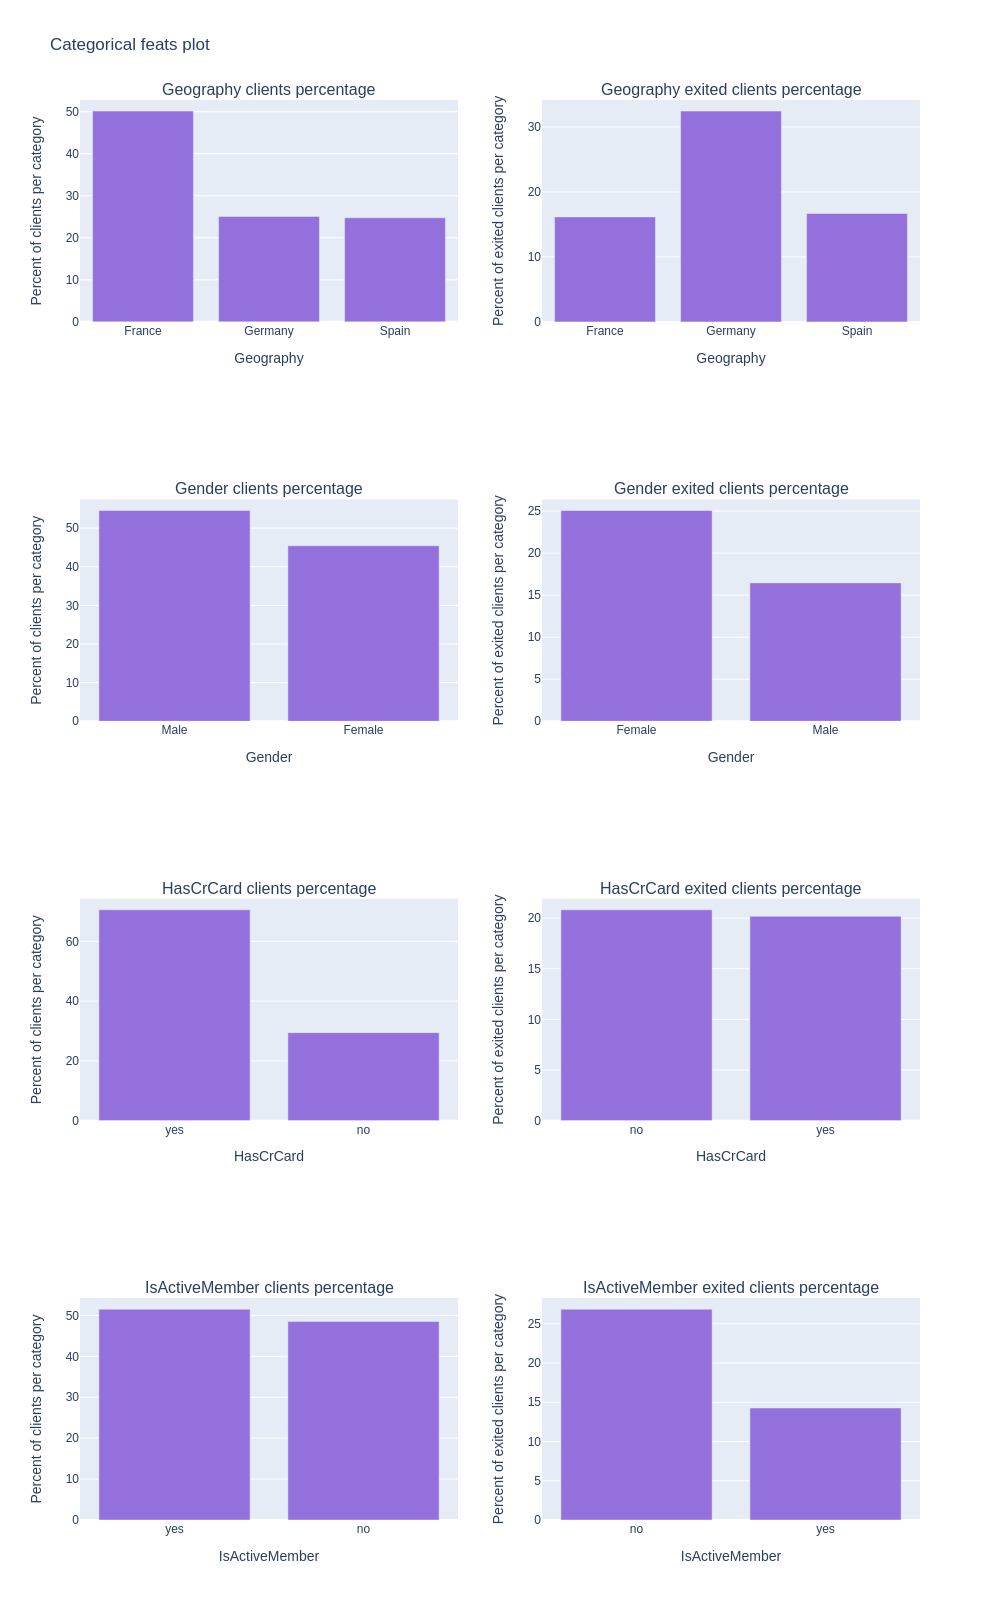

In [8]:
# Percentage of exited clients among various categories
num_feats = churn_copy.select_dtypes(include=np.number).columns
cat_feats = churn_copy.drop(['ChurnStatus'], axis=1).select_dtypes(exclude=np.number).columns
target_feat = 'ChurnStatus'
cat_feats_n = cat_feats.shape[0]
num_feats_n = num_feats.shape[0]

cat_feats_title = sum(zip(cat_feats + ' clients percentage', cat_feats + ' exited clients percentage'), ())

fig_cat_feats = make_subplots(rows=cat_feats_n, cols=2, subplot_titles=cat_feats_title)
for i, feat in enumerate(cat_feats):
    exited_vc = churn_copy.groupby(feat)['ChurnStatus'].value_counts(True).unstack() * 100
    category_vc = churn_copy[feat].value_counts(True) * 100
    
    fig_cat_feats.add_trace(
        go.Bar(y=category_vc.values,
               x=category_vc.index,
               marker_color="MediumPurple",
               name='Percent of clients per category'),
        row=i+1, col=1
    )

    fig_cat_feats.add_trace(
        go.Bar(x=exited_vc.index,
               y=exited_vc['exited'],
               marker_color="MediumPurple",
               name='Percent of exited clients per category'),
        row=i+1, col=2
    )
    
    fig_cat_feats['layout']['xaxis' + str(2 * i + 1)]['title'] = feat
    fig_cat_feats['layout']['xaxis' + str(2 * i + 2)]['title'] = feat
    fig_cat_feats['layout']['yaxis' + str(2 * i + 1)]['title'] = 'Percent of clients per category'
    fig_cat_feats['layout']['yaxis' + str(2 * i + 2)]['title'] = 'Percent of exited clients per category'
    
fig_cat_feats.update_layout(
    autosize=False,
    width = 1000,
    height = 400 * cat_feats_n,
    title_text="Categorical feats plot"
)
fig_cat_feats.update(layout_showlegend=False)
fig_cat_feats.write_html('images/cat_feats.html')
fig_cat_feats.write_image('images/cat_feats.png')
fig_cat_feats.show('png')
#fig_cat_feats.show()

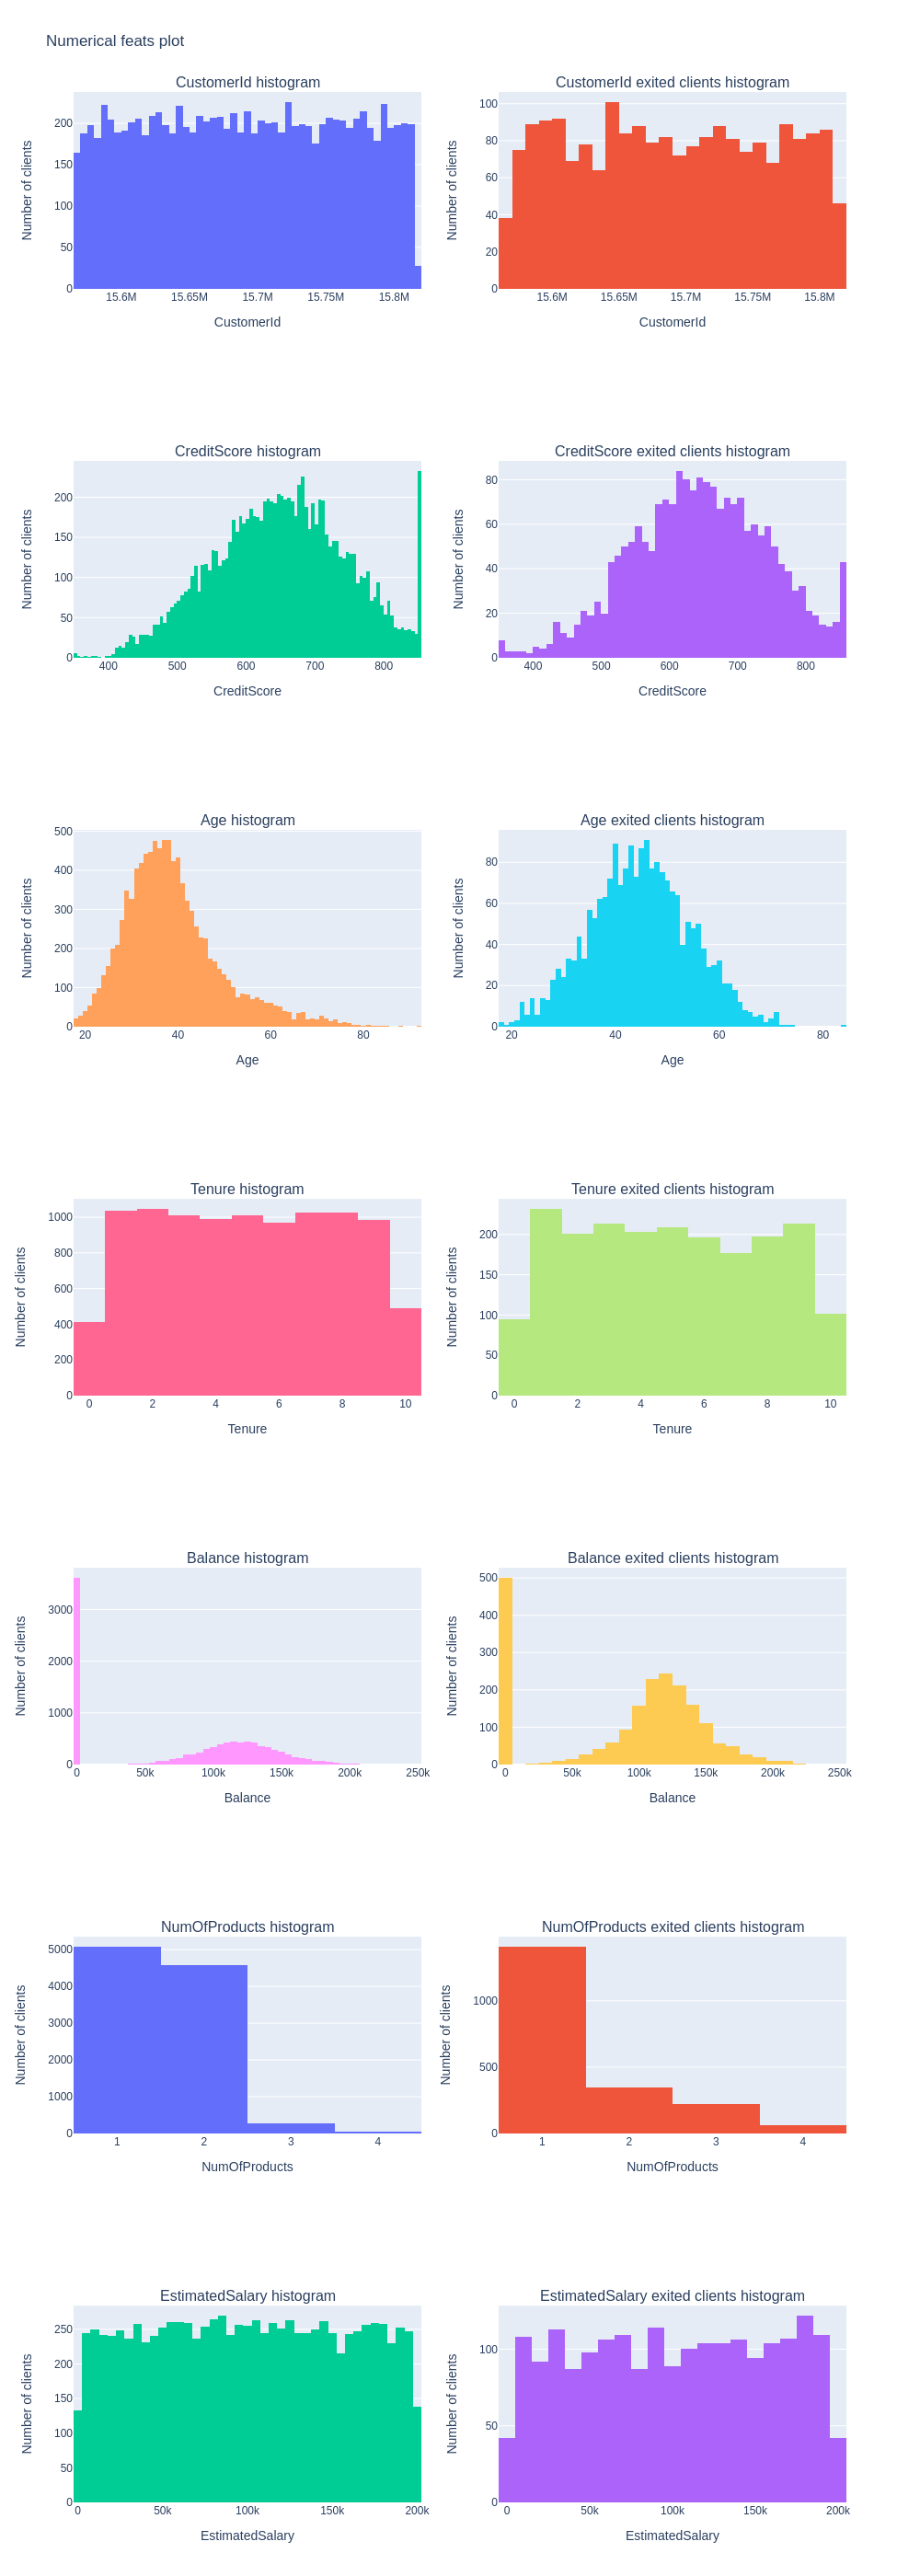

In [9]:
# Number of exited clients depending on numerical features
num_feats_title = sum(zip(num_feats + ' histogram', num_feats + ' exited clients histogram'), ())

fig_num_feats = make_subplots(rows=num_feats_n, cols=2, subplot_titles=num_feats_title)
for i, feat in enumerate(num_feats):
    
    fig_num_feats.add_trace(
        go.Histogram(x=churn_copy[feat],
                     name=feat),
        row=i+1, col=1
    )
    
    fig_num_feats.add_trace(
        go.Histogram(x=churn_copy[churn_copy['ChurnStatus'] == 'exited'][feat],
                    #  histnorm='percent',
                     name=feat),
        row=i+1, col=2
    )
    
    fig_num_feats['layout']['xaxis' + str(2 * i + 1)]['title'] = feat
    fig_num_feats['layout']['xaxis' + str(2 * i + 2)]['title'] = feat
    fig_num_feats['layout']['yaxis' + str(2 * i + 1)]['title'] = 'Number of clients'
    fig_num_feats['layout']['yaxis' + str(2 * i + 2)]['title'] = 'Number of clients'
    
fig_num_feats.update_layout(
    autosize=False,
    width = 1000,
    height = 400 * num_feats_n,
    title_text="Numerical feats plot"
)
fig_num_feats.update(layout_showlegend=False)
fig_num_feats.write_html('images/num_feats.html')
fig_num_feats.write_image('images/num_feats.png')
fig_num_feats.show('png')
#fig_num_feats.show()

В модуле по визуализации мы выяснили, что отток в Германии, Франции и Испании имеет различные показатели. Исследователи, которые уже работали с этим датасетом, пришли к выводу, что наилучшее решение при работе с этими данными — строить модели индивидуально для каждой страны. Мы будем прогнозировать отток в немецком филиале банка. Давайте выделим только данные, относящиеся к Германии:

In [10]:
churn_germany = churn_data[churn_data['Geography'] == 'Germany'].reset_index(drop=True)
churn_germany.shape

(2509, 14)

Сразу избавимся от заведомо неинформативных признаков: страна, номер строки, идентификатор пользователя и имя клиента.

In [11]:
churn_germany.drop(['Geography', 'RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
churn_germany.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,376,Female,29,4,115046.74,4,1,0,119346.88,1
1,616,Male,45,3,143129.41,2,0,1,64327.26,0
2,653,Male,58,1,132602.88,1,1,0,5097.67,1
3,756,Male,36,2,136815.64,1,1,1,170041.95,0
4,574,Female,43,3,141349.43,1,1,1,100187.43,0


Проверим, что в наших данных нет пропусков:

In [12]:
churn_germany.isnull().sum()

CreditScore        0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Проверим, что в наших данных нет дубликатов:

In [13]:
churn_germany[churn_germany.duplicated()].sum()

CreditScore          0
Gender               0
Age                  0
Tenure               0
Balance            0.0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary    0.0
Exited               0
dtype: object

### Задание 5.1 (1 балл)

Давайте сделаем предобработку данных. 

Для начала расширим датасет с помощью методов Feature Engineering. Создайте следующие признаки:
* `BalanceSalaryRatio` — отношение баланса на счетах к заработной плате клиента;
* `TenureByAge` — отношение времени пользования услугами банка к возрасту клиента;
* `CreditScoreGivenAge` — отношение кредитного рейтинга к возрасту клиента.

Затем перекодируйте оставшиеся текстовые категориальные признаки в числовые бинарные столбцы.

Выведите основные статистические характеристики полученных признаков.

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**): 
    * приведён код для создания указанных в задании признаков;
    * приведён код для кодирования категориальных признаков в числовые бинарные столбцы;
    * приведён код для расчёта основных статистических характеристик полученных признаков.

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [14]:
# Generate new features
churn_germany['BalanceSalaryRatio'] = churn_germany['Balance'] / churn_germany['EstimatedSalary']
churn_germany['TenureByAge'] = churn_germany['Tenure'] / churn_germany['Age']
churn_germany['CreditScoreGivenAge'] = churn_germany['CreditScore'] / churn_germany['Age']

# Encode 'Gender'
churn_germany['Gender'] = churn_germany['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
churn_germany.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge
0,376,0,29,4,115046.74,4,1,0,119346.88,1,0.963969,0.137931,12.965517
1,616,1,45,3,143129.41,2,0,1,64327.26,0,2.225020,0.066667,13.688889
2,653,1,58,1,132602.88,1,1,0,5097.67,1,26.012449,0.017241,11.258621
3,756,1,36,2,136815.64,1,1,1,170041.95,0,0.804599,0.055556,21.000000
4,574,0,43,3,141349.43,1,1,1,100187.43,0,1.410850,0.069767,13.348837


In [15]:
# Dataset stats
churn_germany.describe()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge
count,2509.000000,2509.000000,2509.000000,2509.000000,2509.000000,2509.000000,2509.00000,2509.000000,2509.000000,2509.000000,2509.000000,2509.000000,2509.000000
mean,651.453567,0.524512,39.771622,5.009964,119730.116134,1.519729,0.71383,0.497409,101113.435102,0.324432,9.024870,0.134303,17.526487
std,98.168937,0.499498,10.519143,2.935154,27022.006157,0.619420,0.45206,0.500093,58263.011501,0.468256,214.286020,0.087680,5.349558
min,350.000000,0.000000,18.000000,0.000000,27288.430000,1.000000,0.00000,0.000000,11.580000,0.000000,0.192582,0.000000,6.112676
25%,584.000000,0.000000,32.000000,2.000000,102800.720000,1.000000,0.00000,0.000000,51016.020000,0.000000,0.783284,0.060606,13.686275
50%,651.000000,1.000000,38.000000,5.000000,119703.100000,1.000000,1.00000,0.000000,102397.220000,0.000000,1.197220,0.125000,16.857143
75%,722.000000,1.000000,45.000000,8.000000,137560.380000,2.000000,1.00000,1.000000,151083.800000,1.000000,2.400083,0.200000,20.852941
max,850.000000,1.000000,84.000000,10.000000,214346.960000,4.000000,1.00000,1.000000,199970.740000,1.000000,10614.655440,0.500000,46.388889


Разделим исходный набор данных на матрицу наблюдений `X` (фичи) и столбец ответов `y` (таргет). 

In [16]:
X = churn_germany.drop("Exited", axis=1)
y = churn_germany["Exited"]

Прежде чем перейти к этапу разделения выборки на тренировочную и тестовую, давайте посмотрим на сбалансированность данных. Для этого воспользуемся методом `value_counts()` и выведем количество наблюдений каждого из классов в долевом соотношении от общего количества наблюдений:

In [17]:
y.value_counts(normalize=True)

Exited
0    0.675568
1    0.324432
Name: proportion, dtype: float64

Очевидно, что классы не сбалансированы. Ушедших пользователей 32 %, в то время как лояльных — 68 %.


**К чему это может привести?**

При разделении набора данных на тренировочный и тестовый может возникнуть такая ситуация, что в тренировочную выборку попадут только лояльные клиенты или их большая часть. Тогда модель может не научиться определять вероятность оттока и качество на тестовой выборке будет неудовлетворительным.

Или противоположная ситуация: в тестовую выборку попадут только лояльные клиенты. Тогда модель будет показывать отличное качество на тестовой выборке, но в реальных условиях она может оказаться бесполезной.

То есть нам нужно сделать так, чтобы в тренировочной и тестовой выборке было одинаковое соотношение лояльных и ушедших клиентов. Такое разбиение выборки называется **стратифицированным**. 

Функция `train_test_split()` из библиотеки `sklearn` умеет производить такое разбиение. Для этого в ней предусмотрен параметр `stratify`, который нужно выставить в значение признака, который должен иметь одинаковые соотношения в тренировочной и тестовой выборке. У нас этот признак - это целевой признак y. 

Выполним разбиение, установив значение параметра `random_state` на 0:


In [18]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, 
    stratify=y, 
    random_state=0
)
print(f'Train shape: {X_train.shape}')
print(f'Test shape: {X_test.shape}')

Train shape: (1881, 12)
Test shape: (628, 12)


Проверим, что число лояльных и ушедших клиентов примерно одинаково в каждой из выборок:

In [19]:
print('Train :')
display(y_train.value_counts(normalize=True))
print('\n')
print('Test :', )
display(y_test.value_counts(normalize=True))

Train :


Exited
0    0.675704
1    0.324296
Name: proportion, dtype: float64



Test :


Exited
0    0.675159
1    0.324841
Name: proportion, dtype: float64

Соотношения одинаковы, а значит, мы можем перейти к следующему шагу.

### Задание 5.2 (1 балл)

Позаботьтесь о масштабировании признаков. Проведите нормализацию/стандартизацию матрицы наблюдений `X` с помощью `MinMaxScaler`/`RobustScaler` или `StandardScaler`. Выберите метод самостоятельно.

Обучите один из предложенных скейлеров на тренировочной выборке (вычислите параметры трансформации) и примените трансформацию данных к тренировочной и тестовой выборкам.

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**): 
    * приведён код для создания одного из вариантов скейлеров для масштабирования данных;
    * приведён код для расчёта параметров трансформации (обучение скейлера) на тренировочной выборке;
    * приведён код для трансформации тренировочных и тестовых данных (признаков) в соответствии с вычисленными параметрами.

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [20]:
# Data scaling
scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Теперь переходим к моделированию.

### Задание 5.3 (1 балл)

Для начала давайте заранее определим метрику, на которую будем ориентироваться. 

По условию задачи, наша модель должна своевременно предсказывать отток клиентов. Известно, что для сохранения клиентов банк будет использовать ресурсы колл-центра и клиентам, у которых вероятность оттока наиболее высока, будут сделаны специальные предложения. Ресурсы, выделяемые на сохранение клиентов, ограничены, поэтому нам важно минимизировать количество звонков. Однако в то же время необходимо сохранить как можно больше клиентов.

Таким образом, нам бы хотелось минимизировать как ложноположительные и ложноотрицательные срабатывания модели.

Какую метрику в данной задаче вы будете пытаться улучшить? Обоснуйте свой выбор. 


*В этом случае целесообразно использовать метрику F1, чтобы соблюсти баланс между ошибками I и II рода.*

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**): 
    * выбрана верная метрика;
    * приведено развернутое обоснование выбора метрики, и приведенные рассуждения являются верными;

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

> Ваши рассуждения и ответ — *здесь*.

### Задание 5.4 (2 балла)

Обучите модель логистической регрессии (`Logistic Regression`) на тренировочных данных. Позаботьтесь о воспроизводимости результата, установив конкретное значение параметра `random_state` (например, число 42).

Сделайте предсказание меток классов для тренировочной и тестовой выборок. 

Рассчитайте значение целевой метрики на тренировочной и тестовой выборках. 

Проинтерпретируйте полученные результаты, ответив на следующий вопрос:
* Как вы считаете, является ли ваша модель переобученной или недообученной?

> **Примечание.** Будем считать, что модель нас не удовлетворяет (считается недообученной), если значение целевой метрики на тестовой выборке меньше 0.5.

**Дополнительное задание:**

Попробуйте поуправлять следующими параметрами модели:
* `penalty` — тип используемой регуляризации ('l1' — $L_1$-регуляризация, 'l2' — $L_2$-регуляризация);
* `C` — коэффициент, обратный коэффициенту регуляризации (по умолчанию он равен 1).

Понаблюдайте, как ведут себя метрики в зависимости от типа регуляризации и увеличения/уменьшения значения парамера `C`.

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * построена модель логистической регрессии, решающая поставленную задачу;
    * с помощью полученной модели сформированы предсказания на тренировочной и тестовой выборках;
    * приведён расчёт выбранной метрики на тренировочных и тестовых данных (метрика должна быть выбрана корректно);
    * приведён небольшой вывод по полученным результатам, в котором содержится ответ на поставленный в задании вопрос.

- Задание выполнено верно, но не приведён вывод по полученным результатам или вывод является неверным (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [21]:
# Model learning
logreg_scaled = linear_model.LogisticRegression(solver='saga', random_state=42, max_iter=1000)
logreg_scaled.fit(X_train_scaled, y_train)

# Prediction
y_train_pred_scaled = logreg_scaled.predict(X_train_scaled)
y_test_pred_scaled = logreg_scaled.predict(X_test_scaled)
print('Train sample metrics:')
print(metrics.classification_report(y_train, y_train_pred_scaled))
print('\n')
print('Test sample metrics:')
print(metrics.classification_report(y_test, y_test_pred_scaled))

Train sample metrics:
              precision    recall  f1-score   support

           0       0.76      0.89      0.82      1271
           1       0.63      0.40      0.49       610

    accuracy                           0.73      1881
   macro avg       0.69      0.64      0.65      1881
weighted avg       0.72      0.73      0.71      1881



Test sample metrics:
              precision    recall  f1-score   support

           0       0.75      0.89      0.81       424
           1       0.62      0.38      0.47       204

    accuracy                           0.72       628
   macro avg       0.68      0.63      0.64       628
weighted avg       0.71      0.72      0.70       628



*Результаты на тестовой выборке лишь незначительно хуже, чем на тренировочной. Низкое значение recall означает большой процент ошибок II рода. Целевая метрика F1 ниже 0.5 на обоих выборках, что является неудовлетворительным результатом. Модель недообучена.*

### L2 regularization

In [22]:
# Alter C parameter in order to get the best f1 metric
c_range = np.linspace(1, 20, 20)
recall_scores_train_l2 = []
precision_scores_train_l2 = []
f1_scores_train_l2 = []

recall_scores_test_l2 = []
precision_scores_test_l2 = []
f1_scores_test_l2 = []

for c_value in c_range:
    logreg_scaled_l2 = linear_model.LogisticRegression(solver='saga', penalty='l2', random_state=42, C=c_value, \
        max_iter=1000)
    logreg_scaled_l2.fit(X_train_scaled, y_train)
    
    y_train_pred_l2 = logreg_scaled_l2.predict(X_train_scaled)
    y_test_pred_l2 = logreg_scaled_l2.predict(X_test_scaled)
    
    recall_scores_train_l2.append(metrics.recall_score(y_train, y_train_pred_l2))
    precision_scores_train_l2.append(metrics.precision_score(y_train, y_train_pred_l2))
    f1_scores_train_l2.append(metrics.f1_score(y_train, y_train_pred_l2))
    
    recall_scores_test_l2.append(metrics.recall_score(y_test, y_test_pred_l2))
    precision_scores_test_l2.append(metrics.precision_score(y_test, y_test_pred_l2))
    f1_scores_test_l2.append(metrics.f1_score(y_test, y_test_pred_l2))
    
# Train sample metrics
precision_train_l2_df = pd.DataFrame({'Metric': 'Precision', 'C value': c_range, 'Score': precision_scores_train_l2})
recall_train_l2_df = pd.DataFrame({'Metric': 'Recall', 'C value': c_range, 'Score': recall_scores_train_l2})
f1_train_l2_df = pd.DataFrame({'Metric': 'F1', 'C value': c_range, 'Score': f1_scores_train_l2})
metric_train_l2_df = pd.concat([precision_train_l2_df, recall_train_l2_df, f1_train_l2_df], ignore_index=True)
metric_train_l2_df.head()

,Metric,C value,Score
0,Precision,1.0,0.632124
1,Precision,2.0,0.632754
2,Precision,3.0,0.630807
3,Precision,4.0,0.628641
4,Precision,5.0,0.627119


In [23]:
# Test sample metrics
precision_test_l2_df = pd.DataFrame({'Metric': 'Precision', 'C value': c_range, 'Score': precision_scores_test_l2})
recall_test_l2_df = pd.DataFrame({'Metric': 'Recall', 'C value': c_range, 'Score': recall_scores_test_l2})
f1_test_l2_df = pd.DataFrame({'Metric': 'F1', 'C value': c_range, 'Score': f1_scores_test_l2})
metric_test_l2_df = pd.concat([precision_test_l2_df, recall_test_l2_df, f1_test_l2_df], ignore_index=True)
metric_test_l2_df.head()

,Metric,C value,Score
0,Precision,1.0,0.620968
1,Precision,2.0,0.604478
2,Precision,3.0,0.608696
3,Precision,4.0,0.604317
4,Precision,5.0,0.604317


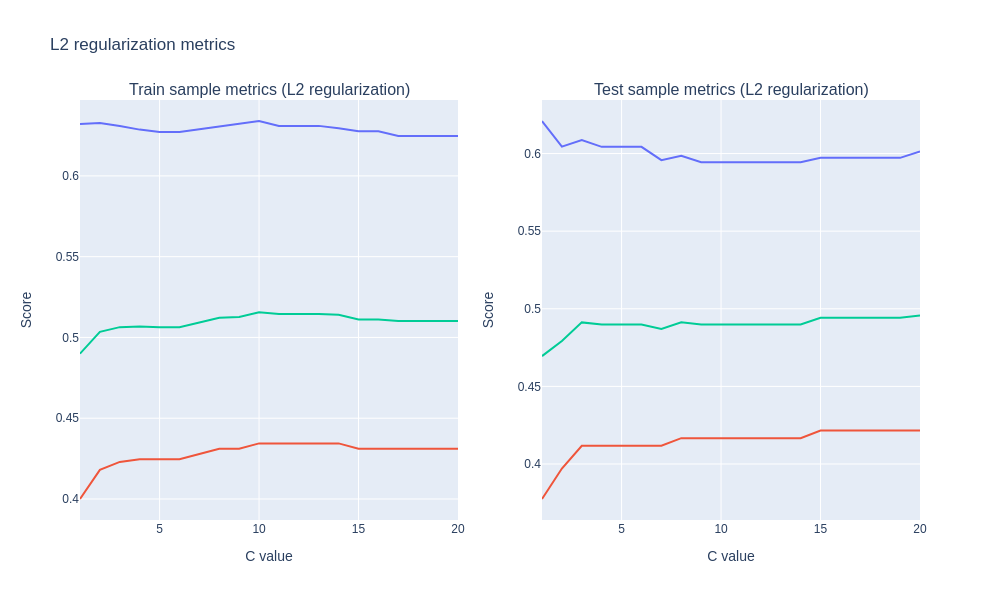

In [24]:
l2_titles = ['Train sample metrics (L2 regularization)', \
    'Test sample metrics (L2 regularization)']

fig_c_l2 = make_subplots(rows=1, cols=2, subplot_titles=l2_titles)
fig_metrics_train_l2 = px.line(metric_train_l2_df, x='C value', y='Score', color='Metric')
fig_metrics_test_l2 = px.line(metric_test_l2_df, x='C value', y='Score', color='Metric')

for trace in fig_metrics_train_l2.select_traces():
    fig_c_l2.add_trace(trace, row=1, col=1)

for trace in fig_metrics_test_l2.select_traces():
    fig_c_l2.add_trace(trace, row=1, col=2)

fig_c_l2['layout']['xaxis1']['title'] = 'C value'
fig_c_l2['layout']['xaxis2']['title'] = 'C value'
fig_c_l2['layout']['yaxis1']['title'] = 'Score'
fig_c_l2['layout']['yaxis2']['title'] = 'Score'
    
fig_c_l2.update_layout(
    autosize=False,
    width=1000,
    height=600,
    title_text='L2 regularization metrics'
)
fig_c_l2.update(layout_showlegend=False)
fig_c_l2.write_html('images/logreg_scale_l2.html')
fig_c_l2.write_image('images/logreg_scale_l2.png')
fig_c_l2.show('png')
#fig_c_l2.show()

### L1 regularization

In [25]:
# Alter C parameter in order to get the best f1 metric
c_range = np.linspace(1, 20, 20)
recall_scores_train_l1 = []
precision_scores_train_l1 = []
f1_scores_train_l1 = []

recall_scores_test_l1 = []
precision_scores_test_l1 = []
f1_scores_test_l1 = []

for c_value in c_range:
    logreg_scaled_l1 = linear_model.LogisticRegression(solver='saga', penalty='l1', random_state=42, C=c_value, \
        max_iter=1000)
    logreg_scaled_l1.fit(X_train_scaled, y_train)
    
    y_train_pred_l1 = logreg_scaled_l1.predict(X_train_scaled)
    y_test_pred_l1 = logreg_scaled_l1.predict(X_test_scaled)
    
    recall_scores_train_l1.append(metrics.recall_score(y_train, y_train_pred_l1))
    precision_scores_train_l1.append(metrics.precision_score(y_train, y_train_pred_l1))
    f1_scores_train_l1.append(metrics.f1_score(y_train, y_train_pred_l1))
    
    recall_scores_test_l1.append(metrics.recall_score(y_test, y_test_pred_l1))
    precision_scores_test_l1.append(metrics.precision_score(y_test, y_test_pred_l1))
    f1_scores_test_l1.append(metrics.f1_score(y_test, y_test_pred_l1))
    
# Train sample metrics
precision_train_l1_df = pd.DataFrame({'Metric': 'Precision', 'C value': c_range, 'Score': precision_scores_train_l1})
recall_train_l1_df = pd.DataFrame({'Metric': 'Recall', 'C value': c_range, 'Score': recall_scores_train_l1})
f1_train_l1_df = pd.DataFrame({'Metric': 'F1', 'C value': c_range, 'Score': f1_scores_train_l1})
metric_train_l1_df = pd.concat([precision_train_l1_df, recall_train_l1_df, f1_train_l1_df], ignore_index=True)
metric_train_l1_df.head()

,Metric,C value,Score
0,Precision,1.0,0.634146
1,Precision,2.0,0.623810
2,Precision,3.0,0.626478
3,Precision,4.0,0.624413
4,Precision,5.0,0.628235


In [26]:
# Test sample metrics
precision_test_l1_df = pd.DataFrame({'Metric': 'Precision', 'C value': c_range, 'Score': precision_scores_test_l1})
recall_test_l1_df = pd.DataFrame({'Metric': 'Recall', 'C value': c_range, 'Score': recall_scores_test_l1})
f1_test_l1_df = pd.DataFrame({'Metric': 'F1', 'C value': c_range, 'Score': f1_scores_test_l1})
metric_test_l1_df = pd.concat([precision_test_l1_df, recall_test_l1_df, f1_test_l1_df], ignore_index=True)
metric_test_l1_df.head()

,Metric,C value,Score
0,Precision,1.0,0.594203
1,Precision,2.0,0.594406
2,Precision,3.0,0.590278
3,Precision,4.0,0.598592
4,Precision,5.0,0.601399


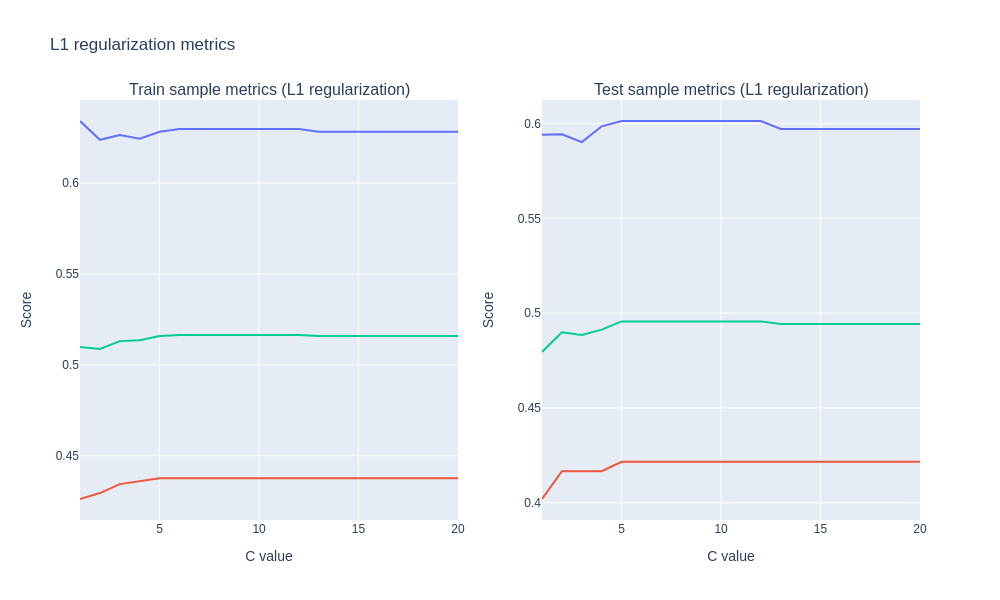

In [27]:
l1_titles = ['Train sample metrics (L1 regularization)', \
    'Test sample metrics (L1 regularization)']

fig_c_l1 = make_subplots(rows=1, cols=2, subplot_titles=l1_titles)
fig_metrics_train_l1 = px.line(metric_train_l1_df, x='C value', y='Score', color='Metric')
fig_metrics_test_l1 = px.line(metric_test_l1_df, x='C value', y='Score', color='Metric')

for trace in fig_metrics_train_l1.select_traces():
    fig_c_l1.add_trace(trace, row=1, col=1)

for trace in fig_metrics_test_l1.select_traces():
    fig_c_l1.add_trace(trace, row=1, col=2)

fig_c_l1['layout']['xaxis1']['title'] = 'C value'
fig_c_l1['layout']['xaxis2']['title'] = 'C value'
fig_c_l1['layout']['yaxis1']['title'] = 'Score'
fig_c_l1['layout']['yaxis2']['title'] = 'Score'
    
fig_c_l1.update_layout(
    autosize=False,
    width = 1000,
    height = 600,
    title_text='L1 regularization metrics'
)
fig_c_l1.update(layout_showlegend=False)
fig_c_l1.write_html('images/logreg_scale_l1.html')
fig_c_l1.write_image('images/logreg_scale_l1.png')
fig_c_l1.show('png')
#fig_c_l1.show()

*Подбор гиперпараметра C показывает лишь незначительное улучшение метрики F1. L1 регуляризация выдаёт те же значения, но при меньших C. В целом можно заключить, что модель на основе факторов первых порядков (гиперплоскость), показывает неудовлетворительные результаты (недообучение модели). Стоит рассмотреть модели с полиномиальными признаками (факторами высших степеней).*

### Задание 5.5 (2 балла)

Сгенерируйте полиномиальные признаки третьей степени для тренировочной и тестовой выборок. Используйте класс `PolynomialFeatures` из библиотеки `sklearn`. Параметр `include_bias` выставите в значение `False`.

> **Примечание.** Обратите внимание, что для генерации полиномов необходимо использовать масштабированные данные.

Обучите модель логистической регрессии на полиномиальных признаках (`Logistic Regression`). Позаботьтесь о воспроизводимости результат, установив конкретное значение параметра `random_state` (например, число 42).

Предскажите метки классов для тренировочной и тестовой выборок.

Рассчитайте значение целевой метрики на тренировочной и тестовой выборках для модели, обученной на полиномиальных признаках.

Сравните результат с полученным ранее. Удалось ли вам улучшить качество вашей модели?

**Дополнительное задание:**

Попробуйте поуправлять следующими параметрами модели:
* `penalty` — тип используемой регуляризации ('l1' — $L_1$-регуляризация, 'l2' — $L_2$-регуляризация);
* `C` — коэффициент, обратный коэффициенту регуляризации (по умолчанию он равен 1).

Понаблюдайте, как ведут себя метрики в зависимости от типа регуляризации и увеличения/уменьшения значения парамера `C`.

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * сгенерированы полиномиальные признаки третьей степени;
    * построена модель логистической регрессии, решающая поставленную задачу на основе сгенерированных признаков;
    * с помощью полученной модели сформированы предсказания на тренировочной и тестовой выборках;
    * приведён расчёт выбранной метрики на тренировочных и тестовых данных (метрика должна быть выбрана корректно);
    * приведён небольшой вывод по полученным результатам, в котором содержится корректный ответ на поставленный в задании вопрос.

- Задание выполнено верно, но не приведён вывод по полученным результатам или вывод является неверным (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [28]:
# Generate polynomial features
poly = preprocessing.PolynomialFeatures(degree=3, include_bias=False)
poly.fit(X_train_scaled)

X_train_scaled_poly = poly.transform(X_train_scaled)
X_test_scaled_poly = poly.transform(X_test_scaled)

print(f'Train sample shape: {X_train_scaled_poly.shape}')
print(f'Test sample shape: {X_test_scaled_poly.shape}')

Train sample shape: (1881, 454)
Test sample shape: (628, 454)


### L1 regularization

In [29]:
# Alter C parameter in order to get the best f1 metric
c_range = np.linspace(1, 20, 20)
recall_scores_train_poly_l1 = []
precision_scores_train_poly_l1 = []
f1_scores_train_poly_l1 = []

recall_scores_test_poly_l1 = []
precision_scores_test_poly_l1 = []
f1_scores_test_poly_l1 = []

for c_value in c_range:
    logreg_scaled_poly_l1 = linear_model.LogisticRegression(solver='saga', penalty='l1', random_state=42, \
        C=c_value, max_iter=10000)
    logreg_scaled_poly_l1.fit(X_train_scaled_poly, y_train)
    
    y_train_pred_poly_l1 = logreg_scaled_poly_l1.predict(X_train_scaled_poly)
    y_test_pred_poly_l1 = logreg_scaled_poly_l1.predict(X_test_scaled_poly)
    
    recall_scores_train_poly_l1.append(metrics.recall_score(y_train, y_train_pred_poly_l1))
    precision_scores_train_poly_l1.append(metrics.precision_score(y_train, y_train_pred_poly_l1))
    f1_scores_train_poly_l1.append(metrics.f1_score(y_train, y_train_pred_poly_l1))
    
    recall_scores_test_poly_l1.append(metrics.recall_score(y_test, y_test_pred_poly_l1))
    precision_scores_test_poly_l1.append(metrics.precision_score(y_test, y_test_pred_poly_l1))
    f1_scores_test_poly_l1.append(metrics.f1_score(y_test, y_test_pred_poly_l1))
    
# Train sample metrics
precision_train_poly_l1_df = pd.DataFrame({
    'Metric': 'Precision', 
    'C value': c_range, 
    'Score': precision_scores_train_poly_l1})

recall_train_poly_l1_df = pd.DataFrame({
    'Metric': 'Recall', 
    'C value': c_range, 
    'Score': recall_scores_train_poly_l1})

f1_train_poly_l1_df = pd.DataFrame({
    'Metric': 'F1', 
    'C value': c_range, 
    'Score': f1_scores_train_poly_l1})

metric_train_poly_l1_df = pd.concat([
    precision_train_poly_l1_df, recall_train_poly_l1_df, f1_train_poly_l1_df], ignore_index=True)
metric_train_poly_l1_df.head()

,Metric,C value,Score
0,Precision,1.0,0.763747
1,Precision,2.0,0.772102
2,Precision,3.0,0.776031
3,Precision,4.0,0.777778
4,Precision,5.0,0.769084


In [30]:
# Test sample metrics
precision_test_poly_l1_df = pd.DataFrame({
    'Metric': 'Precision', 
    'C value': c_range, 
    'Score': precision_scores_test_poly_l1})

recall_test_poly_l1_df = pd.DataFrame({
    'Metric': 'Recall', 
    'C value': c_range, 
    'Score': recall_scores_test_poly_l1})

f1_test_poly_l1_df = pd.DataFrame({
    'Metric': 'F1', 
    'C value': c_range, 
    'Score': f1_scores_test_poly_l1})

metric_test_poly_l1_df = pd.concat([precision_test_poly_l1_df, recall_test_poly_l1_df, f1_test_poly_l1_df], \
    ignore_index=True)
metric_test_poly_l1_df.head()

,Metric,C value,Score
0,Precision,1.0,0.739394
1,Precision,2.0,0.722222
2,Precision,3.0,0.707182
3,Precision,4.0,0.704918
4,Precision,5.0,0.712707


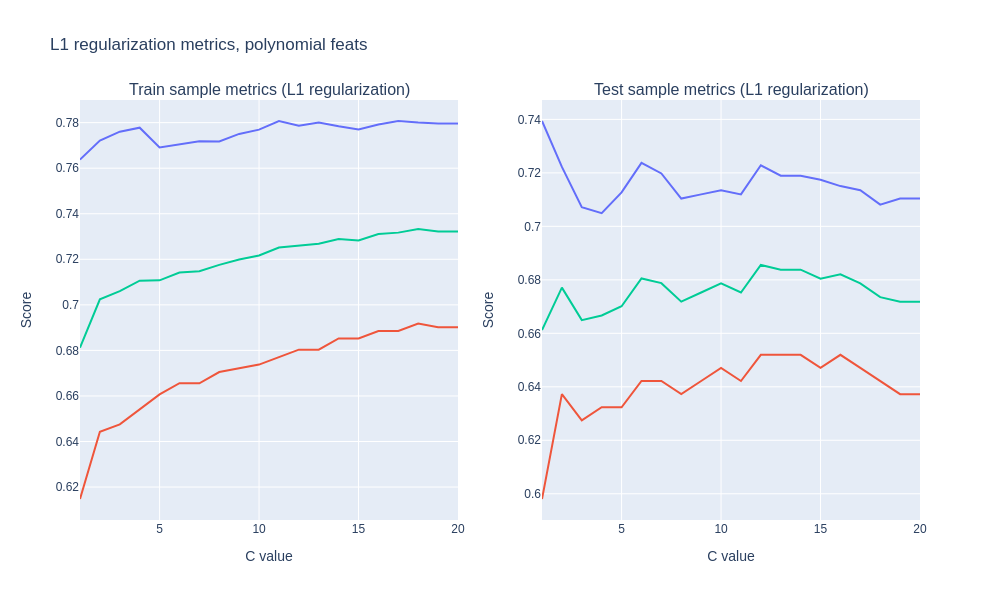

In [31]:
l1_poly_titles = ['Train sample metrics (L1 regularization)', \
    'Test sample metrics (L1 regularization)']

fig_poly_l1 = make_subplots(rows=1, cols=2, subplot_titles=l1_poly_titles)
fig_metrics_train_poly_l1 = px.line(metric_train_poly_l1_df, x='C value', y='Score', color='Metric')
fig_metrics_test_poly_l1 = px.line(metric_test_poly_l1_df, x='C value', y='Score', color='Metric')

for trace in fig_metrics_train_poly_l1.select_traces():
    fig_poly_l1.add_trace(trace, row=1, col=1)

for trace in fig_metrics_test_poly_l1.select_traces():
    fig_poly_l1.add_trace(trace, row=1, col=2)

fig_poly_l1['layout']['xaxis1']['title'] = 'C value'
fig_poly_l1['layout']['xaxis2']['title'] = 'C value'
fig_poly_l1['layout']['yaxis1']['title'] = 'Score'
fig_poly_l1['layout']['yaxis2']['title'] = 'Score'
    
fig_poly_l1.update_layout(
    autosize=False,
    width = 1000,
    height = 600,
    title_text='L1 regularization metrics, polynomial feats'
)
fig_poly_l1.update(layout_showlegend=False)
fig_poly_l1.write_html('images/logreg_poly_l1.html')
fig_poly_l1.write_image('images/logreg_poly_l1.png')
fig_poly_l1.show('png')
#fig_poly_l1.show()

### L2 regularization

In [32]:
# Alter C parameter in order to get the best f1 metric
c_range = np.linspace(1, 20, 20)
recall_scores_train_poly_l2 = []
precision_scores_train_poly_l2 = []
f1_scores_train_poly_l2 = []

recall_scores_test_poly_l2 = []
precision_scores_test_poly_l2 = []
f1_scores_test_poly_l2 = []

for c_value in c_range:
    logreg_scaled_poly_l2 = linear_model.LogisticRegression(solver='saga', penalty='l2', random_state=42, \
        C=c_value, max_iter=10000)
    logreg_scaled_poly_l2.fit(X_train_scaled_poly, y_train)
    
    y_train_pred_poly_l2 = logreg_scaled_poly_l2.predict(X_train_scaled_poly)
    y_test_pred_poly_l2 = logreg_scaled_poly_l2.predict(X_test_scaled_poly)
    
    recall_scores_train_poly_l2.append(metrics.recall_score(y_train, y_train_pred_poly_l2))
    precision_scores_train_poly_l2.append(metrics.precision_score(y_train, y_train_pred_poly_l2))
    f1_scores_train_poly_l2.append(metrics.f1_score(y_train, y_train_pred_poly_l2))
    
    recall_scores_test_poly_l2.append(metrics.recall_score(y_test, y_test_pred_poly_l2))
    precision_scores_test_poly_l2.append(metrics.precision_score(y_test, y_test_pred_poly_l2))
    f1_scores_test_poly_l2.append(metrics.f1_score(y_test, y_test_pred_poly_l2))
    
# Train sample metrics
precision_train_poly_l2_df = pd.DataFrame({
    'Metric': 'Precision', 
    'C value': c_range, 
    'Score': precision_scores_train_poly_l2})

recall_train_poly_l2_df = pd.DataFrame({
    'Metric': 'Recall', 
    'C value': c_range, 
    'Score': recall_scores_train_poly_l2})

f1_train_poly_l2_df = pd.DataFrame({
    'Metric': 'F1', 
    'C value': c_range, 
    'Score': f1_scores_train_poly_l2})

metric_train_poly_l2_df = pd.concat([
    precision_train_poly_l2_df, recall_train_poly_l2_df, f1_train_poly_l2_df], ignore_index=True)
metric_train_poly_l2_df.head()

,Metric,C value,Score
0,Precision,1.0,0.781818
1,Precision,2.0,0.778723
2,Precision,3.0,0.778468
3,Precision,4.0,0.784836
4,Precision,5.0,0.784990


In [33]:
# Test sample metrics
precision_test_poly_l2_df = pd.DataFrame({
    'Metric': 'Precision', 
    'C value': c_range, 
    'Score': precision_scores_test_poly_l2})

recall_test_poly_l2_df = pd.DataFrame({
    'Metric': 'Recall', 
    'C value': c_range, 
    'Score': recall_scores_test_poly_l2})

f1_test_poly_l2_df = pd.DataFrame({
    'Metric': 'F1', 
    'C value': c_range, 
    'Score': f1_scores_test_poly_l2})

metric_test_poly_l2_df = pd.concat([precision_test_poly_l2_df, recall_test_poly_l2_df, f1_test_poly_l2_df], \
    ignore_index=True)
metric_test_poly_l2_df.head()

,Metric,C value,Score
0,Precision,1.0,0.732484
1,Precision,2.0,0.736196
2,Precision,3.0,0.737805
3,Precision,4.0,0.737805
4,Precision,5.0,0.724551


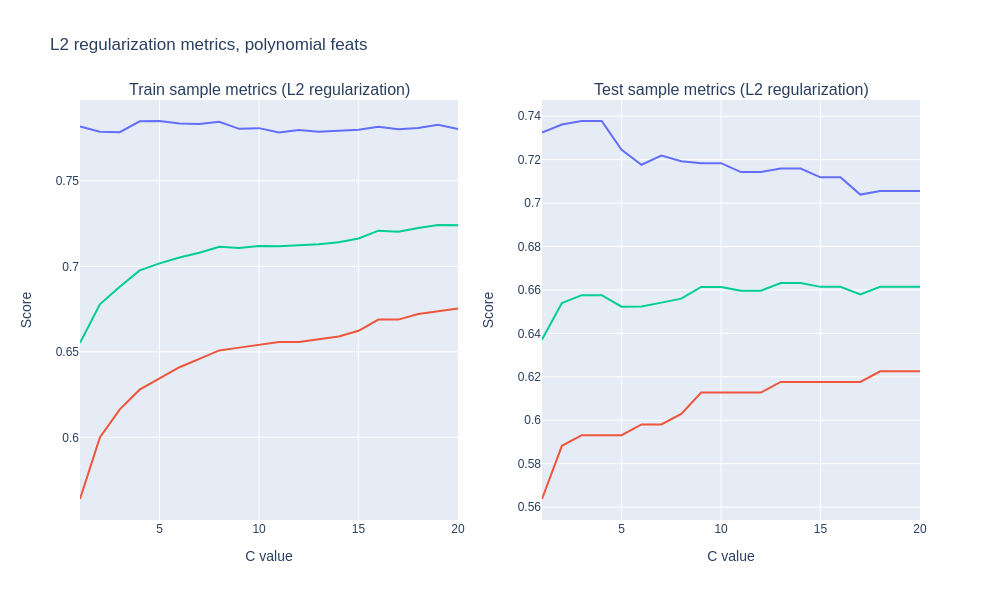

In [34]:
l2_poly_titles = ['Train sample metrics (L2 regularization)', \
    'Test sample metrics (L2 regularization)']

fig_poly_l2 = make_subplots(rows=1, cols=2, subplot_titles=l2_poly_titles)
fig_metrics_train_poly_l2 = px.line(metric_train_poly_l2_df, x='C value', y='Score', color='Metric')
fig_metrics_test_poly_l2 = px.line(metric_test_poly_l2_df, x='C value', y='Score', color='Metric')

for trace in fig_metrics_train_poly_l2.select_traces():
    fig_poly_l2.add_trace(trace, row=1, col=1)

for trace in fig_metrics_test_poly_l2.select_traces():
    fig_poly_l2.add_trace(trace, row=1, col=2)

fig_poly_l2['layout']['xaxis1']['title'] = 'C value'
fig_poly_l2['layout']['xaxis2']['title'] = 'C value'
fig_poly_l2['layout']['yaxis1']['title'] = 'Score'
fig_poly_l2['layout']['yaxis2']['title'] = 'Score'
    
fig_poly_l2.update_layout(
    autosize=False,
    width = 1000,
    height = 600,
    title_text='L2 regularization metrics, polynomial feats'
)
fig_poly_l2.update(layout_showlegend=False)
fig_poly_l2.write_html('images/logreg_poly_l2.html')
fig_poly_l2.write_image('images/logreg_poly_l2.png')
fig_poly_l2.show('png')
#fig_poly_l2.show()

*Модель на основе факторов высших порядков ожидаемо показывает лучшие результаты. При L1 регуляризации, C = 12 значение метрики F1 равно 0.686 на тестовой выборке.*

### Задание 5.6. (2 балла)


Попробуйте подобрать значение порога вероятности, при котором наблюдается наибольшее значение целевой метрики на тестовой выборке. В качестве модели используйте логистическую регрессию, обученную на полиномиальных признаках. 

В качестве порога вероятности используйте значения из следующего диапазона:

`thresholds = np.arange(0.1, 1, 0.05)`

Напомним алгоритм, как определить оптимальный порог вероятности:
* Предсказать вероятности оттока для каждого клиента из тестовой выборки.
* В цикле перебрать значения порогов вероятности threshold:
    * Сделать предсказание класса по принципу: если вероятность > threshold, то отнести объект к классу 1, в противном случае — к классу 0.
    * Рассчитать метрику и занести её в заранее созданный список.

Для реализации алгоритма подбора вы можете воспользоваться шаблоном кода, приведённым ниже:

```python
# Делаем предсказание вероятности оттока для каждого клиента из тестовой выборки
y_test_proba_pred = pd.Series(model.predict_proba(X_test_poly)[:, 1])
# Инициализируем список, куда будем сохранять метрики.
scores = []
# Задаём значения порогов вероятности
thresholds = np.arange(0.1, 1, 0.05)
# В цикле перебираем значения порогов вероятности
for threshold in thresholds:
    # Делаем предсказание
    y_test_pred_poly = y_test_proba_pred.apply(lambda x: 1 if x > threshold else 0)
    # Рассчитываем метрику
    score = # код для вычисления метрики
    # Добавляем результат в список
    scores.append(score)
```

Постройте график зависимости целевой метрики от порога вероятности. На основе построенного графика определите порог вероятности, которому соответствует наибольшее значение целевой метрики на тестовой выборке.

Сделайте предсказание классов с подобранным оптимальным порогом вероятности. Рассчитайте значение целевой метрики на тестовой выборке и сравните результат с полученными ранее.


**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для построения графика зависимости значения выбранной метрики от порога вероятности;
    * найден оптимальный порог вероятности, на котором достигается наибольшее значение выбранной метрики на тестовой выборке;
    * на основе найденного порога вероятности построено предсказание модели для тренировочной и тестовой выборок;
    * приведён расчёт выбранной метрики на тренировочных и тестовых данных (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не приведён вывод по полученным результатам или вывод является неверным (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [35]:
# Model learning
logreg_scaled_poly_l1 = linear_model.LogisticRegression(solver='saga', penalty='l1', random_state=42, C=12, \
    max_iter=10000)
logreg_scaled_poly_l1.fit(X_train_scaled_poly, y_train)

# Alter probability threshold in order to get the best f1 score
thresholds = np.arange(0.1, 1, 0.05)

recall_scores_test_thr = []
precision_scores_test_thr = []
f1_scores_test_thr= []

y_proba_test_pred = logreg_scaled_poly_l1.predict_proba(X_test_scaled_poly)[:, 1]
y_proba_test_pred = pd.Series(y_proba_test_pred)

for threshold in thresholds:
    y_test_pred_thr = y_proba_test_pred.apply(lambda x: 1 if x > threshold else 0)
    recall_scores_test_thr.append(metrics.recall_score(y_test, y_test_pred_thr))
    precision_scores_test_thr.append(metrics.precision_score(y_test, y_test_pred_thr))
    f1_scores_test_thr.append(metrics.f1_score(y_test, y_test_pred_thr))
    
# Test sample metrics
precision_thr_df = pd.DataFrame({'Metric': 'Precision', 'Threshold': thresholds, 'Score': precision_scores_test_thr})
recall_thr_df = pd.DataFrame({'Metric': 'Recall', 'Threshold': thresholds, 'Score': recall_scores_test_thr})
f1_thr_df = pd.DataFrame({'Metric': 'F1', 'Threshold': thresholds, 'Score': f1_scores_test_thr})
metric_thr_df = pd.concat([precision_thr_df, recall_thr_df, f1_thr_df], ignore_index=True)
metric_thr_df.head()

,Metric,Threshold,Score
0,Precision,0.10,0.460048
1,Precision,0.15,0.504065
2,Precision,0.20,0.543544
3,Precision,0.25,0.591837
4,Precision,0.30,0.617647


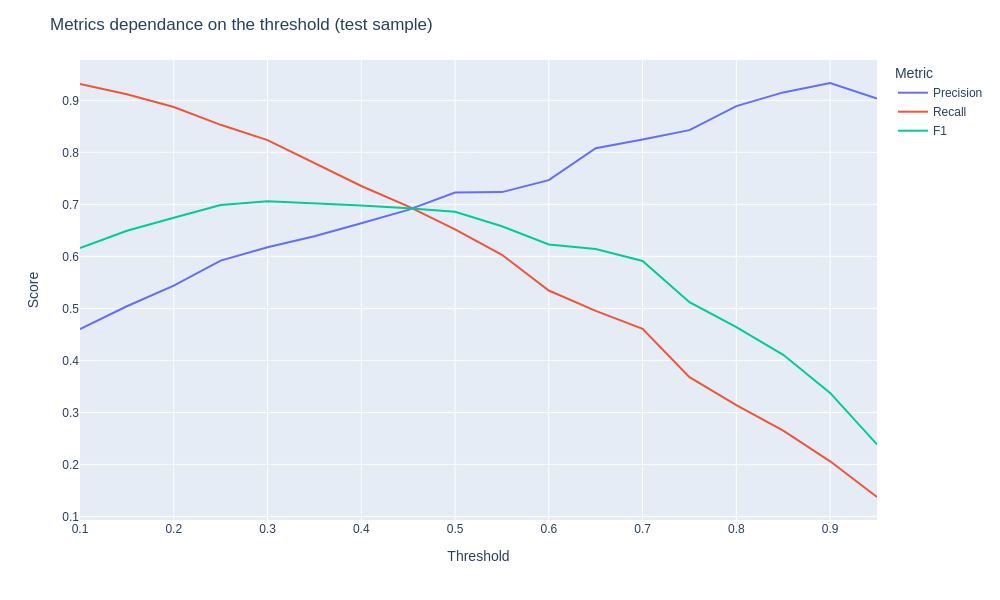

In [36]:
fig_thr_metrics = px.line(metric_thr_df, x='Threshold', y='Score', color='Metric')
fig_thr_metrics.update_layout(
        autosize=False,
        width=1000,
        height=600,
        title_text="Metrics dependance on the threshold (test sample)"
    )

fig_thr_metrics.update_xaxes(title_text='Threshold')
fig_thr_metrics.update_yaxes(title_text='Score')
fig_thr_metrics.update(layout_showlegend=True)
fig_thr_metrics.write_html('images/logreg_poly_l1_thr.html')
fig_thr_metrics.write_image('images/logreg_poly_l1_thr.png')
fig_thr_metrics.show('png')
#fig_thr_metrics.show()

In [37]:
# Prediction results on optimal threshold
y_proba_train_pred = pd.Series(logreg_scaled_poly_l1.predict_proba(X_train_scaled_poly)[:, 1])
y_proba_test_pred = pd.Series(logreg_scaled_poly_l1.predict_proba(X_test_scaled_poly)[:, 1])

y_train_pred_thr = y_proba_train_pred.apply(lambda x: 1 if x > 0.3 else 0)
y_test_pred_thr = y_proba_test_pred.apply(lambda x: 1 if x > 0.3 else 0)

train_result_df = pd.DataFrame({
    'True class': list(y_train),
    'Predicted class': list(y_train_pred_thr),
    'Probability': list(y_proba_train_pred)
    })

test_result_df = pd.DataFrame({
    'True class': list(y_test),
    'Predicted class': list(y_test_pred_thr),
    'Probability': list(y_proba_test_pred)
    })

train_result_df.sample(5)

,True class,Predicted class,Probability
316,0,0,0.156689
516,0,0,0.019861
967,0,0,0.000814
987,0,0,0.110694
864,1,1,0.590908


In [38]:
test_result_df.sample(5)

,True class,Predicted class,Probability
410,0,0,0.111666
393,0,0,0.025164
292,0,1,0.634931
314,0,1,0.315020
207,0,0,0.039113


In [39]:
print(f'Train sample f1 score: {metrics.f1_score(y_train, y_train_pred_thr)}')
print(f'Test sample f1 score: {metrics.f1_score(y_test, y_test_pred_thr)}')

Train sample f1 score: 0.7285613040396882
Test sample f1 score: 0.7058823529411765


*Модель логистической регрессии с полиномиальными признаками и L1 регуляризацией пока показывает лучший результат. Путём подбора порога вероятности удалость достичь значения метрики F1 равное 0.706 (при гиперпараметре C=12). Предсказание модели с порогом вероятности 0.3 на тестовой выборке также даёт значение метрики F1 больше 0.7*

## Практика: деревья решений и случайный лес

Мы продолжаем решать задачу прогнозирования оттока клиентов банка.

Ранее мы построили модель логистической регрессии, затем добавили в модель полиномиальные признаки и подобрали оптимальный порог вероятности для логистической регрессии.

> Теперь попробуем решить задачу с помощью деревьев решений и лесов.


> **Примечание №1.** Для выполнения дальнейших заданий необходимо совершить уже знакомые шаги предобработки с данными об оттоке клиентов банка, а именно:
* выделить данные, относящиеся к отделениям банка в Германии;
* избавиться от заведомо неинформативных признаков;
* расширить датасет путём добавления новых признаков;
* разделить выборку на тренировочную и тестовую со стратификацией.

> **Примечание №2.** Деревья решений — алгоритм, способный уловить нелинейные зависимости. Генерация полиномиальных признаков практически не имеет значения.
Также деревья решений не чувствительны к масштабу признаков. Масштабирование исходных данных не играет роли при построении деревьев решения.
Поэтому для решения задачи используйте обучающую (`X_train`, `y_train`) и тестовую (`X_test`, `y_test`) выборки без полиномиальных столбцов.


In [40]:
# Data reading
churn_data = pd.read_csv('data/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [41]:
# German clients only
churn_germany = churn_data[churn_data['Geography'] == 'Germany'].reset_index(drop=True)
churn_germany.shape

(2509, 14)

In [42]:
# Drop non-informative features
churn_germany.drop(['Geography', 'RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
churn_germany.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,376,Female,29,4,115046.74,4,1,0,119346.88,1
1,616,Male,45,3,143129.41,2,0,1,64327.26,0
2,653,Male,58,1,132602.88,1,1,0,5097.67,1
3,756,Male,36,2,136815.64,1,1,1,170041.95,0
4,574,Female,43,3,141349.43,1,1,1,100187.43,0


In [43]:
# Generate new features
churn_germany['BalanceSalaryRatio'] = churn_germany['Balance'] / churn_germany['EstimatedSalary']
churn_germany['TenureByAge'] = churn_germany['Tenure'] / churn_germany['Age']
churn_germany['CreditScoreGivenAge'] = churn_germany['CreditScore'] / churn_germany['Age']

# Encode 'Gender'
churn_germany['Gender'] = churn_germany['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
churn_germany.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge
0,376,0,29,4,115046.74,4,1,0,119346.88,1,0.963969,0.137931,12.965517
1,616,1,45,3,143129.41,2,0,1,64327.26,0,2.225020,0.066667,13.688889
2,653,1,58,1,132602.88,1,1,0,5097.67,1,26.012449,0.017241,11.258621
3,756,1,36,2,136815.64,1,1,1,170041.95,0,0.804599,0.055556,21.000000
4,574,0,43,3,141349.43,1,1,1,100187.43,0,1.410850,0.069767,13.348837


In [44]:
# Divide data on factors and target
X = churn_germany.drop("Exited", axis=1)
y = churn_germany["Exited"]

In [45]:
# Split X, y on train and test samples
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y,
    stratify=y,
    random_state=0
)
print(f'Train shape: {X_train.shape}')
print(f'Test shape: {X_test.shape}')

Train shape: (1881, 12)
Test shape: (628, 12)


Импортируем необходимые для выполнения практики модули:

In [46]:
from sklearn import tree
from sklearn import ensemble

Приступим! Выполните задания 8.1–8.4.

### Задание 8.1. (2 балла)

Обучите на тренировочной выборке дерево решений из библиотеки `sklearn` (`DecisionTreeClassifier`) с неограниченной максимальной глубиной дерева. В качестве критерия информативности используйте энтропию Шеннона, остальные параметры оставьте по умолчанию. 

Также позаботьтесь о воспроизводимости результатов, установив конкретное  значение `random_state` (например, число 42). 

Сделайте предсказания для тренировочной и тестовой выборок. Рассчитайте значение целевой метрики на каждой из выборок.

Сделайте вывод, ответив на вопрос:
* Как вы считаете, является полученная модель переобученной или недообученной? Попробуйте дать обоснование, почему так происходит.


**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * построена модель дерева решений с заданными в условии задачи параметрами;
    * с помощью полученной модели сформированы предсказания для тренировочной и тестовой выборок;
    * приведён расчёт выбранной метрики на тренировочных и тестовых данных (метрика должна быть выбрана корректно);
    * приведён небольшой вывод по полученным результатам, в котором содержится корректный ответ на поставленный в задании вопрос, а также обоснование полученного результата.

- Задание выполнено верно, но не приведено обоснование полученного результата или обоснование является некорректным (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [47]:
# Model creation and learning
dt_clf_full = tree.DecisionTreeClassifier(
    criterion='entropy',
    random_state=42
)

dt_clf_full.fit(X_train, y_train)

# Prediction
y_train_dt_pred = dt_clf_full.predict(X_train)
y_test_dt_pred = dt_clf_full.predict(X_test)

print('Train sample metrics:')
print(metrics.classification_report(y_train, y_train_dt_pred))
print('\n')
print('Test sample metrics:')
print(metrics.classification_report(y_test, y_test_dt_pred))

Train sample metrics:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1271
           1       1.00      1.00      1.00       610

    accuracy                           1.00      1881
   macro avg       1.00      1.00      1.00      1881
weighted avg       1.00      1.00      1.00      1881



Test sample metrics:
              precision    recall  f1-score   support

           0       0.79      0.82      0.80       424
           1       0.59      0.55      0.57       204

    accuracy                           0.73       628
   macro avg       0.69      0.68      0.69       628
weighted avg       0.72      0.73      0.73       628



*Модель является переобученной, так как значения всех метрик на тренировочной выборке равны 1, а на тестовой - значительно ниже. Это произошло потому, что модель не имеет ни лимита по глубине дерева, ни по минимальному числу листьев. Из-за этого модель идеально подстроилась под тренировочные данные.*

### Задание 8.2. (1 балл)

Давайте «подстрижём» наше дерево. 

Обучите на тренировочной выборке дерево решений из библиотеки `sklearn` (`DecisionTreeClassifier`) с максимальной глубиной 8. В качестве критерия информативности используйте энтропию Шеннона, минимальное число объектов в листе (количество объектов, при которых дерево прекратит делиться и образуется лист) — 10.

Также позаботьтесь о воспроизводимости результатов, установив конкретное значение `random_state` (например, число 42).

Сделайте предсказания для тренировочной и тестовой выборок. Рассчитайте значение целевой метрики на каждой из выборок.

Сравните результат с полученными ранее. Сделайте вывод.


**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балла**): 
    * построена модель дерева решений с заданными в условии задачи параметрами;
    * с помощью полученной модели сформированы предсказания для тренировочной и тестовой выборок;
    * приведён расчёт выбранной метрики на тренировочных и тестовых данных (метрика должна быть выбрана корректно);
    * приведён небольшой вывод по полученным результатам, в котором содержится корректный ответ на поставленный в задании вопрос.

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [48]:
# Model creation and learning
dt_clf_full_limited = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_depth=8,
    min_samples_leaf=10,
    random_state=42
)

dt_clf_full_limited.fit(X_train, y_train)

# Prediction
y_train_dt_limited_pred = dt_clf_full_limited.predict(X_train)
y_test_dt_limited_pred = dt_clf_full_limited.predict(X_test)

print('Train sample metrics:')
print(metrics.classification_report(y_train, y_train_dt_limited_pred))
print('\n')
print('Test sample metrics:')
print(metrics.classification_report(y_test, y_test_dt_limited_pred))

Train sample metrics:
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1271
           1       0.80      0.65      0.72       610

    accuracy                           0.83      1881
   macro avg       0.82      0.79      0.80      1881
weighted avg       0.83      0.83      0.83      1881



Test sample metrics:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       424
           1       0.71      0.58      0.64       204

    accuracy                           0.79       628
   macro avg       0.76      0.73      0.74       628
weighted avg       0.78      0.79      0.78       628



*Ограничения по глубине дерева и минимальному числу листьев привело к тому, что модель выдаёт более скромные результаты на тренировочной выборке (f1 = 0.72), но лучшим результатам на тестовой выборке (f1 = 0.64). Таким образом, назвать полученную модель переобученной уже нельзя.*

### Задание 8.3. (1 балл)

Давайте воспользуемся случайным лесом. 

Постройте случайный лес (`RandomForestClassifier`) из 500 деревьев с максимальной глубиной 8. Критерий информативности — энтропия Шеннона, минимальное число объектов в листе (количество объектов, при которых дерево прекратит делиться и образуется лист) — 10.

Также позаботьтесь о воспроизводимости результатов, установив конкретное значение значение `random_state` (например, число 42).

Сделайте предсказания для тренировочной и тестовой выборок. Рассчитайте значение целевой метрики на каждой из выборок.

Сравните качество одного дерева решений с качеством случайного леса на тестовой выборке. Смогли ли вы улучшить метрику?


**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**): 
    * построена модель дерева решений с заданными в условии задачи параметрами;
    * с помощью полученной модели сформированы предсказания для тренировочной и тестовой выборок;
    * приведён расчёт выбранной метрики на тренировочных и тестовых данных (метрика должна быть выбрана корректно);
    * приведён небольшой вывод по полученным результатам, в котором содержится корректный ответ на поставленный в задании вопрос.

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [49]:
# Model creation and learning
rf_clf = ensemble.RandomForestClassifier(
    n_estimators=500,
    criterion='entropy',
    max_depth=8,
    min_samples_leaf=10,
    random_state=42
)

rf_clf.fit(X_train, y_train)

# Prediction
y_train_rf_pred = rf_clf.predict(X_train)
y_test_rf_pred = rf_clf.predict(X_test)

print('Train sample metrics:')
print(metrics.classification_report(y_train, y_train_rf_pred))
print('\n')
print('Test sample metrics:')
print(metrics.classification_report(y_test, y_test_rf_pred))

Train sample metrics:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      1271
           1       0.86      0.64      0.74       610

    accuracy                           0.85      1881
   macro avg       0.85      0.80      0.82      1881
weighted avg       0.85      0.85      0.84      1881



Test sample metrics:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       424
           1       0.75      0.58      0.66       204

    accuracy                           0.80       628
   macro avg       0.78      0.74      0.76       628
weighted avg       0.80      0.80      0.79       628



*Применение случайного леса позволило улучшить метрику F1. Результаты на тестовой выборке: 0.66*

### Задание 8.4. (2 балла)

Мы на финишной прямой. 


Попробуйте подобрать значение порога вероятности, при котором наблюдается наибольшее значение целевой метрики на тестовой выборке. **Используйте ту модель (из рассмотренных ранее), которая показала наилучшее качество на тестовой выборке.**


В качестве порога вероятности используйте значения из следующего диапазона:

`thresholds = np.arange(0.1, 1, 0.05)`

Напомним алгоритм, как определить оптимальный порог вероятности:
* Предсказать вероятности оттока для каждого клиента из тестовой выборки.
* В цикле перебрать значения порогов вероятности threshold:
    * Сделать предсказание класса по принципу: если вероятность > threshold, то отнести объект к классу 1, в противном случае — к классу 0.
    * Рассчитать метрику и занести её в заранее созданный список. 

Для реализации алгоритма подбора вы можете воспользоваться шаблоном кода, приведённым ниже:

```python
# Делаем предсказание вероятности оттока для каждого клиента из тестовой выборки
y_test_proba_pred = pd.Series(model.predict_proba(X_test_poly)[:, 1])
# Инициализируем список, куда будем сохранять метрики.
scores = []
# Задаём значения порогов вероятности
thresholds = np.arange(0.1, 1, 0.05)
# В цикле перебираем значения порогов вероятности
for threshold in thresholds:
    # Делаем предсказание
    y_test_pred_poly = y_test_proba_pred.apply(lambda x: 1 if x > threshold else 0)
    # Рассчитываем метрику
    score = # код для вычисления метрики
    # Добавляем результат в список
    scores.append(score)
```

Постройте график зависимости целевой метрики от порога вероятности. На основе построенного графика определите порог вероятности, которому соответствует наибольшее значение целевой метрики на тестовой выборке.

Сделайте предсказание классов с подобранным оптимальным порогом вероятности. Рассчитайте значение целевой метрики на тестовой выборке и сравните полученный результат с полученными ранее. 

Напишите небольшой вывод о проделанной работе, указав в нём, какая из рассмотренных нами моделей показала наилучший результат.

> **Примечание.** Помните о том, что в реальных задачах (а мы решали задачу на реальных данных) мы практически никогда не сможем получить значения метрик, близкие к 1. Если в задаче прогнозирования оттока ваша метрика превышает хотя бы значения 0.6-0.7, вашу модель уже можно считать хорошей и можно говорить о том, что она успешно справляется с задачей.

In [50]:
# Alter probability threshold in order to get the best f1 score
thresholds = np.arange(0.1, 0.85, 0.05)

recall_scores_test_rf_thr = []
precision_scores_test_rf_thr = []
f1_scores_test_rf_thr= []

y_proba_test_rf_pred = rf_clf.predict_proba(X_test)[:, 1]
y_proba_test_rf_pred = pd.Series(y_proba_test_rf_pred)

for threshold in thresholds:
    y_test_rf_pred_thr = y_proba_test_rf_pred.apply(lambda x: 1 if x > threshold else 0)
    recall_scores_test_rf_thr.append(metrics.recall_score(y_test, y_test_rf_pred_thr))
    precision_scores_test_rf_thr.append(metrics.precision_score(y_test, y_test_rf_pred_thr))
    f1_scores_test_rf_thr.append(metrics.f1_score(y_test, y_test_rf_pred_thr))
    
# Test sample metrics
precision_thr_rf_df = pd.DataFrame({'Metric': 'Precision', 'Threshold': thresholds, 'Score': precision_scores_test_rf_thr})
recall_thr_rf_df = pd.DataFrame({'Metric': 'Recall', 'Threshold': thresholds, 'Score': recall_scores_test_rf_thr})
f1_thr_rf_df = pd.DataFrame({'Metric': 'F1', 'Threshold': thresholds, 'Score': f1_scores_test_rf_thr})
metric_thr_rf_df = pd.concat([precision_thr_rf_df, recall_thr_rf_df, f1_thr_rf_df], ignore_index=True)
metric_thr_rf_df.head()

,Metric,Threshold,Score
0,Precision,0.10,0.365989
1,Precision,0.15,0.419355
2,Precision,0.20,0.470437
3,Precision,0.25,0.522796
4,Precision,0.30,0.588448


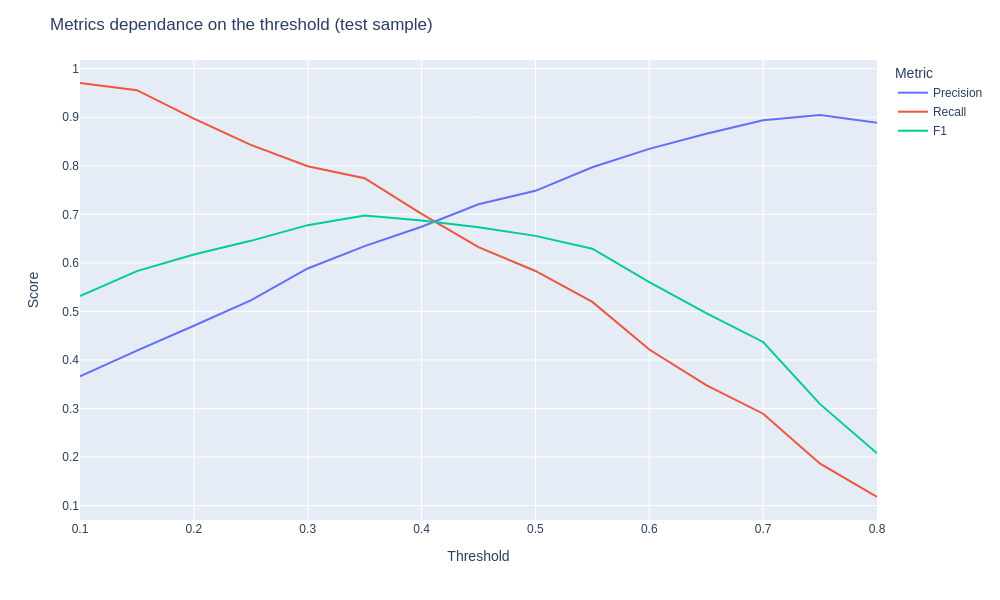

In [51]:
fig_thr_rf_metrics = px.line(metric_thr_rf_df, x='Threshold', y='Score', color='Metric')
fig_thr_rf_metrics.update_layout(
        autosize=False,
        width=1000,
        height=600,
        title_text="Metrics dependance on the threshold (test sample)"
    )

fig_thr_rf_metrics.update_xaxes(title_text='Threshold')
fig_thr_rf_metrics.update_yaxes(title_text='Score')
fig_thr_rf_metrics.update(layout_showlegend=True)
fig_thr_rf_metrics.write_html('images/rf_metrics.html')
fig_thr_rf_metrics.write_image('images/rf_metrics.png')
fig_thr_rf_metrics.show('png')
#fig_thr_rf_metrics.show()

In [52]:
# Prediction results on optimal threshold
y_proba_train_rf_pred = pd.Series(rf_clf.predict_proba(X_train)[:, 1])
y_proba_test_rf_pred = pd.Series(rf_clf.predict_proba(X_test)[:, 1])

y_train_rf_pred_thr = y_proba_train_rf_pred.apply(lambda x: 1 if x > 0.35 else 0)
y_test_rf_pred_thr = y_proba_test_rf_pred.apply(lambda x: 1 if x > 0.35 else 0)

train_result_rf_df = pd.DataFrame({
    'True class': list(y_train),
    'Predicted class': list(y_train_rf_pred_thr),
    'Probability': list(y_proba_train_rf_pred)
    })

test_result_rf_df = pd.DataFrame({
    'True class': list(y_test),
    'Predicted class': list(y_test_rf_pred_thr),
    'Probability': list(y_proba_test_rf_pred)
    })

train_result_rf_df.sample(5)

,True class,Predicted class,Probability
1410,0,0,0.238718
1301,0,0,0.191974
1849,0,0,0.241836
1703,0,0,0.066834
1005,1,1,0.610702


In [53]:
test_result_rf_df.sample(5)

,True class,Predicted class,Probability
353,0,1,0.563661
381,0,0,0.248649
25,0,0,0.277355
371,0,1,0.482635
264,0,0,0.178371


In [54]:
print(f'Train sample f1 score: {metrics.f1_score(y_train, y_train_rf_pred_thr)}')
print(f'Test sample f1 score: {metrics.f1_score(y_test, y_test_rf_pred_thr)}')

Train sample f1 score: 0.7667185069984448
Test sample f1 score: 0.6975717439293598


*Расчёты показывают, что оптимальное значение метрики F1 на тестовой выборке достигается при пороге вероятности 0.35. Предсказание на тестовой выборке, выполненные такой моделью, имеет значение метрики F1 равное 0.698, что является хорошим результатом.*

### Задание 8.5. (1 балл)

Наконец, финальная задача.

У нашего банка есть некоторый клиент, назовём его Василием. В базе данных банка хранятся следующие данные о Василии:

```python
{
    'CreditScore': [601.0],
    'Gender': ['Male'],
    'Age': [42.0],
    'Tenure': [1.0],
    'Balance': [98495.72],
    'NumOfProducts': [1.0],
    'HasCrCard': [1.0],
    'IsActiveMember': [0.0],
    'EstimatedSalary': [40014.76]
}
```

С помощью наилучшей модели спрогнозируйте вероятность того, что Василий откажется от услуг банка.

> **Примечание.** Учтите, что для предсказания необходимо преобразовать данные к тому формату, на котором обучалась модель, то есть:
* добавить признаки дополнительные признаки; 
* произвести кодирование категориальных признаков;
* произвести масштабирование признаков (если ваша модель обучалась на масштабированных данных) с помощью того же скейлера, который вы использовали при обучении модели;
* сгенерировать полиномиальные признаки.

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**): 
    * сформирован DataFrame на основе предоставленного словаря;
    * произведены преобразования данных, необходимые для работы модели;
    * предсказана вероятность оттока клиента (вероятность принадлежности к классу 1).

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

*Лучшей моделью с точки зрения оптимума F1 является логистическая регрессия на полиномиальных признаках, тип регуляризации L1 (C=12). Значение порога вероятности устанавливаем в 0.3*

In [55]:
# Dataframe
client_df = pd.DataFrame({
    'CreditScore': [601.0],
    'Gender': ['Male'],
    'Age': [42.0],
    'Tenure': [1.0],
    'Balance': [98495.72],
    'NumOfProducts': [1.0],
    'HasCrCard': [1.0],
    'IsActiveMember': [0.0],
    'EstimatedSalary': [40014.76]}
)

# Generate new features
client_df['BalanceSalaryRatio'] = client_df['Balance'] / client_df['EstimatedSalary']
client_df['TenureByAge'] = client_df['Tenure'] / client_df['Age']
client_df['CreditScoreGivenAge'] = client_df['CreditScore'] / client_df['Age']

# Encode 'Gender'
client_df['Gender'] = client_df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
client_df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge
0,601.0,1,42.0,1.0,98495.72,1.0,1.0,0.0,40014.76,2.461485,0.02381,14.309524


In [56]:
# Data scaling and generation of polynomial features
client_scaled_df = scaler.transform(client_df)
client_scaled_poly_df = poly.transform(client_scaled_df)

# Prediction with the best model on optimal threshold
client_proba = pd.Series(logreg_scaled_poly_l1.predict_proba(client_scaled_poly_df)[:, 1])
predicted_class = client_proba.apply(lambda x: 1 if x > 0.3 else 0)
print(f'Predicted class: {predicted_class.iloc[0]}')
print(f'Probability: {client_proba.iloc[0]}')

Predicted class: 1
Probability: 0.6584226904401642
